|Student Id          |Name             |Email contact    |
|:-------------------|:---------------:|----------------:|
|            |Min Thein Win    |mmtw.cs@gmail.com|

- This Jupyter Notebook file is a report on experimenting with fine-tuning a pretrained model from the best training(Train4-Final) results.

###Download Annotated Dataset

In [ ]:
%%capture
%%bash
wget https://github.com/mintheinwin/Tiger-Lion-Dataset_Final/releases/download/v2.3.4/107_Assignment_Animal_Dataset_Annotation.zip
mkdir -p datasets
unzip 107_Assignment_Animal_Dataset_Annotation.zip -d datasets/

###Install model library

In [ ]:
#Install model library
%%capture
!pip install ultralytics
!pip install comet_ml

###Setup the logging to save train result log history

In [ ]:
#Configuring Experiment Tracking Tools using wandb
from ultralytics import settings
settings.update({"wandb": True,
                 #"comet.ml": False,
                 "tensorboard": False})

###Training

In [ ]:
!ls -la datasets/valid/images | wc -l

49


###Pretrained Model and Training Configuration

Fine-Tuning a Pre-Trained YOLOv8s Model

In [ ]:
#Load a pre-trained YOLO model
from ultralytics import YOLO #import library
model = YOLO("yolov8s.pt")
#Train the model with improved parameters
result = model.train(
    data="datasets/data.yaml",    # Dataset configuration
    epochs=100,                   # 100 epochs for better convergence
    imgsz=640,                    # Image size 640 x 640
    save_period=1,                # Save model weights every 1 epochs
    batch=4,                      # Number of images processed together in one forward/backward
    device=0,                     # Use GPU 0
    project='LionTigerDetect_V2', # Project name
    lr0=0.0005,                   # This rate is ideal for fine-tuning pre-trained models or avoiding overshooting and overfitting
    augment=True,                 # Enable augmentation use for Mixup one image on another, blending their annotations,Color Jitter and etc..
    plots=True,                   # Enable plotting for Monitor Training, Debugging and Analysis
    optimizer="AdamW",            # Use AdamW optimizer
    workers=4,                    # Number of data loading workers
)

100%|██████████| 21.5M/21.5M [00:00<00:00, 105MB/s]


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=datasets/data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=4, project=LionTigerDetect_V2, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 20.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 96.9MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 242 images, 0 backgrounds, 0 corrupt: 100%|██████████| 242/242 [00:00<00:00, 2013.94it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<00:00, 1615.95it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to LionTigerDetect_V2/train/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to LionTigerDetect_V2/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       1.2G      1.315      2.244      1.678          6        640: 100%|██████████| 61/61 [00:09<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.15it/s]

                   all         46         68      0.368      0.365      0.208     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.21G      1.238      1.853       1.61          3        640: 100%|██████████| 61/61 [00:09<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]

                   all         46         68      0.698      0.573      0.657      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.21G      1.182      1.728      1.593         13        640: 100%|██████████| 61/61 [00:07<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.10it/s]

                   all         46         68      0.891      0.655      0.786      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.22G      1.167      1.572      1.566          6        640: 100%|██████████| 61/61 [00:07<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.29it/s]

                   all         46         68      0.672       0.75      0.756        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.21G      1.214      1.499      1.569         10        640: 100%|██████████| 61/61 [00:07<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.50it/s]

                   all         46         68      0.825       0.68      0.787      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       1.2G      1.159      1.485      1.583          4        640: 100%|██████████| 61/61 [00:07<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.06it/s]

                   all         46         68      0.767      0.592      0.684       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.21G       1.09      1.396      1.509          6        640: 100%|██████████| 61/61 [00:08<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.71it/s]

                   all         46         68      0.744      0.654      0.743      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.19G      1.095      1.363      1.525          7        640: 100%|██████████| 61/61 [00:06<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.07it/s]

                   all         46         68       0.72      0.693      0.724      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.21G      1.159       1.36      1.533          5        640: 100%|██████████| 61/61 [00:09<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.28it/s]

                   all         46         68      0.787      0.661      0.666      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.25G      1.137      1.388      1.531          8        640: 100%|██████████| 61/61 [00:06<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]

                   all         46         68      0.767      0.706      0.763      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.21G      1.072      1.279      1.498          4        640: 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.74it/s]

                   all         46         68       0.77      0.594      0.693      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.25G      1.055      1.199       1.46          8        640: 100%|██████████| 61/61 [00:06<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.72it/s]

                   all         46         68      0.781      0.707      0.771      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.21G      1.054      1.249      1.477          7        640: 100%|██████████| 61/61 [00:09<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.13it/s]

                   all         46         68      0.786      0.696      0.789      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.21G      1.032      1.193      1.448          8        640: 100%|██████████| 61/61 [00:06<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.13it/s]

                   all         46         68      0.761       0.74      0.768      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.24G      1.078      1.194      1.505          6        640: 100%|██████████| 61/61 [00:08<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.93it/s]

                   all         46         68      0.824       0.72      0.765      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.25G     0.9781      1.046      1.424          6        640: 100%|██████████| 61/61 [00:06<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.50it/s]

                   all         46         68      0.878      0.688      0.814      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.25G     0.9998       1.17      1.438         11        640: 100%|██████████| 61/61 [00:07<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.99it/s]

                   all         46         68      0.849      0.623      0.768      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.25G     0.9966      1.155      1.443          6        640: 100%|██████████| 61/61 [00:08<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.47it/s]

                   all         46         68      0.832      0.723      0.825      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.21G     0.9689      1.089      1.414          6        640: 100%|██████████| 61/61 [00:06<00:00,  9.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.25it/s]

                   all         46         68      0.851      0.733       0.84       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.22G     0.9858      1.063      1.415          6        640: 100%|██████████| 61/61 [00:09<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.79it/s]

                   all         46         68      0.916       0.76       0.87      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.21G     0.9676      1.042      1.408         12        640: 100%|██████████| 61/61 [00:06<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.04it/s]

                   all         46         68      0.802      0.764      0.781       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.21G     0.9574     0.9866      1.396          6        640: 100%|██████████| 61/61 [00:09<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.16it/s]

                   all         46         68      0.907        0.8      0.876      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.21G     0.8921     0.9916      1.363          7        640: 100%|██████████| 61/61 [00:06<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.85it/s]

                   all         46         68        0.9      0.783      0.895      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       1.2G     0.9165     0.9819      1.366          9        640: 100%|██████████| 61/61 [00:08<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.94it/s]

                   all         46         68      0.902      0.834       0.88      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.25G     0.9492     0.9646      1.391          7        640: 100%|██████████| 61/61 [00:07<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.09it/s]

                   all         46         68      0.871      0.806      0.875      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.25G     0.9241     0.9504       1.37          6        640: 100%|██████████| 61/61 [00:07<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.91it/s]

                   all         46         68      0.863      0.761      0.853      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.21G     0.9082     0.9127      1.373          6        640: 100%|██████████| 61/61 [00:08<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.36it/s]

                   all         46         68      0.906      0.719      0.859      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.21G     0.9268     0.9738      1.369          3        640: 100%|██████████| 61/61 [00:06<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.35it/s]

                   all         46         68      0.819      0.785      0.846      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.21G     0.9134      0.934       1.37         10        640: 100%|██████████| 61/61 [00:08<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]

                   all         46         68      0.877      0.767      0.872      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.21G     0.8862     0.9293      1.356          7        640: 100%|██████████| 61/61 [00:06<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.41it/s]

                   all         46         68      0.879      0.766      0.853      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.21G      0.853     0.9361      1.339          3        640: 100%|██████████| 61/61 [00:09<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.45it/s]

                   all         46         68       0.79      0.734      0.817      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.21G     0.8769     0.8701      1.328         11        640: 100%|██████████| 61/61 [00:06<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.67it/s]

                   all         46         68      0.837      0.713      0.818      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.25G     0.8421     0.8626      1.294          8        640: 100%|██████████| 61/61 [00:09<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.66it/s]

                   all         46         68      0.859      0.738      0.817      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.25G     0.8564      0.869      1.316          4        640: 100%|██████████| 61/61 [00:07<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.39it/s]

                   all         46         68      0.827      0.845      0.853      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.25G     0.8366     0.8442      1.313         11        640: 100%|██████████| 61/61 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.52it/s]

                   all         46         68      0.874      0.825      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.22G     0.8491     0.8329      1.297          4        640: 100%|██████████| 61/61 [00:07<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.77it/s]

                   all         46         68      0.899      0.756      0.849      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.24G     0.8059      0.812      1.291          8        640: 100%|██████████| 61/61 [00:06<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.50it/s]

                   all         46         68      0.964      0.787      0.876      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.21G     0.7843     0.7502      1.246         11        640: 100%|██████████| 61/61 [00:08<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]

                   all         46         68      0.915      0.807      0.899       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.21G      0.766     0.7466      1.248          7        640: 100%|██████████| 61/61 [00:06<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.89it/s]

                   all         46         68      0.884      0.812      0.892      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       1.2G     0.7622     0.7592      1.275         10        640: 100%|██████████| 61/61 [00:09<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.00it/s]

                   all         46         68      0.948      0.799      0.888      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.21G     0.8027     0.7773      1.279          7        640: 100%|██████████| 61/61 [00:06<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.73it/s]

                   all         46         68      0.984      0.773      0.889      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.25G     0.7792     0.7417      1.283          3        640: 100%|██████████| 61/61 [00:09<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.22it/s]

                   all         46         68      0.957       0.81      0.919      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.25G     0.7966     0.7661      1.259          4        640: 100%|██████████| 61/61 [00:06<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.47it/s]

                   all         46         68       0.92      0.819      0.912      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.24G     0.7836     0.7598      1.275          9        640: 100%|██████████| 61/61 [00:09<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.79it/s]

                   all         46         68      0.878       0.85      0.898      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.25G     0.7715     0.7429      1.246         15        640: 100%|██████████| 61/61 [00:06<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]

                   all         46         68       0.88      0.821      0.897      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.21G     0.7608     0.7267      1.247          6        640: 100%|██████████| 61/61 [00:08<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.86it/s]

                   all         46         68      0.937      0.855      0.896      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       1.2G     0.7559     0.7466      1.252          8        640: 100%|██████████| 61/61 [00:07<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.89it/s]

                   all         46         68      0.879      0.848      0.877      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.21G     0.7243      0.739       1.25          8        640: 100%|██████████| 61/61 [00:07<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.96it/s]

                   all         46         68      0.928      0.821      0.889      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.21G     0.7413      0.682      1.261          8        640: 100%|██████████| 61/61 [00:08<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]

                   all         46         68      0.889      0.813      0.885        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.21G     0.7507     0.6959      1.248          9        640: 100%|██████████| 61/61 [00:06<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.22it/s]

                   all         46         68      0.895      0.867      0.893      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.25G     0.7629     0.7239      1.274          6        640: 100%|██████████| 61/61 [00:08<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.74it/s]

                   all         46         68       0.89       0.83      0.885      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.22G     0.7314     0.6539      1.219          5        640: 100%|██████████| 61/61 [00:06<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.91it/s]

                   all         46         68      0.944      0.779      0.889      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       1.2G     0.6939     0.6501      1.209          8        640: 100%|██████████| 61/61 [00:09<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.83it/s]

                   all         46         68      0.922      0.808      0.856        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.22G     0.6848     0.6382      1.218          7        640: 100%|██████████| 61/61 [00:06<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.37it/s]

                   all         46         68       0.93       0.81      0.892      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.25G     0.6952     0.6604      1.206          5        640: 100%|██████████| 61/61 [00:09<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.88it/s]

                   all         46         68      0.929      0.849      0.911      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.19G     0.7377     0.6188      1.221          7        640: 100%|██████████| 61/61 [00:07<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.52it/s]

                   all         46         68      0.959      0.835      0.912      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.25G     0.7261     0.6587       1.24          6        640: 100%|██████████| 61/61 [00:08<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.64it/s]

                   all         46         68      0.944      0.843      0.909       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.21G     0.7186     0.6937      1.236          7        640: 100%|██████████| 61/61 [00:07<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.45it/s]

                   all         46         68      0.937      0.869      0.943      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       1.2G     0.6692     0.6196      1.185          6        640: 100%|██████████| 61/61 [00:07<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.56it/s]

                   all         46         68      0.934      0.847      0.927      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.21G     0.6483     0.6254      1.176          7        640: 100%|██████████| 61/61 [00:08<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.39it/s]

                   all         46         68      0.906      0.869      0.906      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.21G       0.69     0.6078      1.185         12        640: 100%|██████████| 61/61 [00:06<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.26it/s]

                   all         46         68      0.935      0.841      0.911      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.21G     0.7043     0.6305      1.229          5        640: 100%|██████████| 61/61 [00:09<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.76it/s]

                   all         46         68      0.956       0.87       0.92      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       1.2G     0.6658     0.5977      1.197          8        640: 100%|██████████| 61/61 [00:06<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.86it/s]

                   all         46         68      0.933      0.792      0.892      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.21G     0.6709     0.6458      1.205          6        640: 100%|██████████| 61/61 [00:09<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.22it/s]

                   all         46         68      0.882      0.781      0.878      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.21G     0.6268     0.5565      1.132         10        640: 100%|██████████| 61/61 [00:06<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.83it/s]

                   all         46         68      0.904      0.789      0.885      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.25G     0.6072     0.5917       1.15          7        640: 100%|██████████| 61/61 [00:08<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.60it/s]

                   all         46         68      0.898      0.789      0.887      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.21G     0.6316     0.5636      1.157          7        640: 100%|██████████| 61/61 [00:07<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.43it/s]

                   all         46         68       0.93      0.783      0.901      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.22G     0.6453     0.5997      1.174         11        640: 100%|██████████| 61/61 [00:07<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.56it/s]

                   all         46         68      0.865      0.846       0.91      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       1.2G     0.6348      0.553      1.146          7        640: 100%|██████████| 61/61 [00:08<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.28it/s]

                   all         46         68      0.863      0.789      0.871       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.21G     0.6247     0.5646      1.161          6        640: 100%|██████████| 61/61 [00:06<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.16it/s]

                   all         46         68      0.846       0.81      0.859      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.21G     0.6062     0.5461      1.143         10        640: 100%|██████████| 61/61 [00:09<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.42it/s]

                   all         46         68      0.866      0.812      0.867       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.19G     0.6015      0.543      1.141          7        640: 100%|██████████| 61/61 [00:06<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.59it/s]

                   all         46         68      0.916      0.898      0.917      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.21G      0.691     0.6036      1.204          9        640: 100%|██████████| 61/61 [00:09<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.30it/s]

                   all         46         68      0.963      0.868      0.916      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.25G     0.6222     0.5561      1.154          5        640: 100%|██████████| 61/61 [00:06<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.13it/s]

                   all         46         68      0.913      0.847      0.902      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.21G     0.5696     0.5265      1.117          7        640: 100%|██████████| 61/61 [00:08<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.48it/s]

                   all         46         68       0.89      0.839      0.902      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.21G     0.5907     0.5426      1.118          8        640: 100%|██████████| 61/61 [00:07<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.93it/s]

                   all         46         68      0.863      0.869      0.898      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.21G     0.6302     0.5545       1.18          5        640: 100%|██████████| 61/61 [00:07<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.99it/s]

                   all         46         68       0.87      0.866       0.89      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.21G     0.5967     0.5275      1.139          6        640: 100%|██████████| 61/61 [00:09<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.06it/s]

                   all         46         68      0.888      0.852      0.892      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.21G     0.5976     0.5085      1.124          9        640: 100%|██████████| 61/61 [00:06<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.31it/s]

                   all         46         68      0.921      0.881      0.918      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.21G     0.5938     0.5239      1.128          6        640: 100%|██████████| 61/61 [00:09<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.62it/s]

                   all         46         68      0.901      0.898      0.936      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.21G     0.5878      0.514      1.123          4        640: 100%|██████████| 61/61 [00:06<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.21it/s]

                   all         46         68      0.947       0.87      0.936       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.21G     0.5732     0.4806      1.108          4        640: 100%|██████████| 61/61 [00:09<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 13.01it/s]

                   all         46         68      0.949       0.87      0.929      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.21G     0.5791     0.4976      1.108         11        640: 100%|██████████| 61/61 [00:07<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.18it/s]

                   all         46         68      0.947      0.862      0.926      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.22G     0.5818     0.4987      1.138          3        640: 100%|██████████| 61/61 [00:07<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.76it/s]

                   all         46         68      0.947      0.858      0.932      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.25G     0.5709     0.4969      1.131          5        640: 100%|██████████| 61/61 [00:10<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]

                   all         46         68      0.908      0.866      0.941      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       1.2G     0.5579     0.4858      1.127          6        640: 100%|██████████| 61/61 [00:09<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.31it/s]

                   all         46         68      0.887      0.858      0.929      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       1.2G     0.5563     0.4879        1.1         11        640: 100%|██████████| 61/61 [00:08<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.31it/s]

                   all         46         68      0.839      0.874      0.919      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.24G     0.5294     0.4638      1.088         10        640: 100%|██████████| 61/61 [00:07<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.05it/s]

                   all         46         68      0.903      0.838      0.918      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.25G     0.5751      0.482      1.113          5        640: 100%|██████████| 61/61 [00:07<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]

                   all         46         68      0.923      0.828      0.912      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.25G     0.5463     0.4716      1.114          6        640: 100%|██████████| 61/61 [00:08<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.01it/s]

                   all         46         68      0.888       0.86      0.934      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.21G     0.4446     0.3967      1.015          5        640: 100%|██████████| 61/61 [00:06<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 11.68it/s]

                   all         46         68      0.913      0.912      0.949      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.21G     0.4282     0.3635      1.028          5        640: 100%|██████████| 61/61 [00:09<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.27it/s]

                   all         46         68      0.886      0.936      0.946      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.21G      0.424     0.3628      1.029          6        640: 100%|██████████| 61/61 [00:06<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.25it/s]

                   all         46         68      0.821      0.938      0.931      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.21G     0.3969     0.3421       1.02          4        640: 100%|██████████| 61/61 [00:09<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.33it/s]

                   all         46         68      0.805      0.934      0.929      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       1.2G     0.3983     0.3337      1.008          2        640: 100%|██████████| 61/61 [00:08<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.97it/s]

                   all         46         68       0.81      0.941       0.93      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       1.2G      0.389     0.3136     0.9813          2        640: 100%|██████████| 61/61 [00:07<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.61it/s]

                   all         46         68      0.815      0.913      0.927      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.21G     0.3792     0.3034     0.9928          3        640: 100%|██████████| 61/61 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.56it/s]

                   all         46         68      0.859      0.927      0.928      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.25G     0.4046     0.3006      1.008          4        640: 100%|██████████| 61/61 [00:06<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.96it/s]

                   all         46         68      0.867      0.919      0.932      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.21G     0.3838     0.3053     0.9901          3        640: 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.43it/s]

                   all         46         68      0.831      0.913      0.918      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.22G     0.4055     0.3048      1.028          4        640: 100%|██████████| 61/61 [00:06<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 12.51it/s]

                   all         46         68      0.864      0.909      0.931      0.686



100 epochs completed in 0.266 hours.
Optimizer stripped from LionTigerDetect_V2/train/weights/last.pt, 22.5MB
Optimizer stripped from LionTigerDetect_V2/train/weights/best.pt, 22.5MB

Validating LionTigerDetect_V2/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]


                   all         46         68      0.875       0.94      0.952      0.743
                  lion         28         32      0.856      0.938      0.946      0.723
                 tiger         27         36      0.894      0.942      0.959      0.762
Speed: 0.9ms preprocess, 34.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to LionTigerDetect_V2/train


lr/pg0,█▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,█████▇▇▇▇▇▆▆▆▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁
lr/pg2,▃▆███▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁
metrics/mAP50(B),▃▃▂▁▅▆▅▆▆▅▆▆▆▆▇▇▇▇▆▇▇▇▇▇▆▇▆▆▇▇▇▇▇▇█▇▇███
metrics/mAP50-95(B),▃▂▁▂▂▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇███
metrics/precision(B),▁▅▇▄▆▆▅▆▇▇▆▆▇▆▇█▇▇▇▇██▇▇▇█▇▇▇▇▇██▇▇▇▇▇▆▇
metrics/recall(B),▂▄▂▃▃▃▁▃▄▅▃▄▆▅▄▅▆▆▆▆▆▆▆▆▅▅▅▆▅▅▇▆▆▆▆█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,██▇▇▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▄▄▃▄▄▃▃▃▃▃▃▃▃▃▃▂▁▁▁▁▁


###Export Model

Export model with openvion format.

In [ ]:
model = YOLO("LionTigerDetect_V2/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)

In [ ]:
import zipfile

# Specify the file path and output directory
zip_file_path = "best_int8_openvino_model_V2.zip"
extract_to = "best_int8_openvino_model"

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("File extracted successfully!")

File extracted successfully!


###Test model

###Test image.

Set the confidence threshold to `conf=0.5` and the Intersection over Union (IoU) threshold to `iou=0.5` for Non-Maximum Suppression (NMS). The model will generate bounding boxes exclusively for detections that exceed both thresholds. See the results in the log.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Loading best_int8_openvino_model/best_int8_openvino_model for OpenVINO inference...
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 263.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.7s, installed 1 package: ['openvino>=2024.0.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 /content/tiger_lion.jpg: 640x640 2 lions, 1 tiger, 247.6ms
Speed: 49.7ms preprocess, 247.6ms inference, 77.3ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object

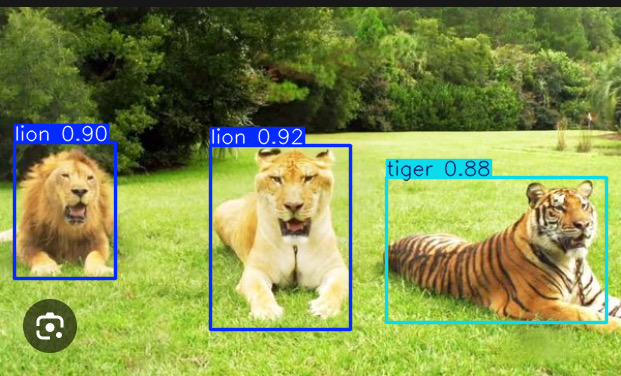

In [ ]:
import ultralytics
from ultralytics import YOLO
from PIL import Image
source = 'tiger_lion.jpg'
#source="must_test.png"
#model = YOLO("LionTigerDetect_V2/train/weights/best_int8_openvino_model", task='detect')
model = YOLO("best_int8_openvino_model", task='detect')
result = model(source, conf=0.5, iou=0.5)
# Visualize the results
for i, r in enumerate(result):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image
    # Show results to screen (in supported environments)
    r.show()
    # Save results to disk
    r.save(filename=f"results{i}.jpg")

### Compress model zip file to get download.


In [ ]:
%%bash
mv ./LionTigerDetect_V2/train/weights/best_int8_openvino_model/ .
zip -r best_int8_openvino_model_V2.zip best_int8_openvino_model

  adding: best_int8_openvino_model/ (stored 0%)
  adding: best_int8_openvino_model/best.xml (deflated 95%)
  adding: best_int8_openvino_model/best.bin (deflated 17%)
  adding: best_int8_openvino_model/metadata.yaml (deflated 31%)


###Test Video

Set the confidence threshold to conf=0.5 and the Intersection over Union (IoU) threshold to iou=0.5 for Non-Maximum Suppression (NMS).

In [ ]:
from ultralytics import YOLO
import cv2
# from tqdm import tqdm
from tqdm.auto import tqdm

def write_video(video_in_filepath, video_out_filepath, model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on GPU Device 0
            results = model(frame, conf=0.5,iou=0.5, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [ ]:
from pathlib import Path
import os

video_in_file = "tiger-vs-lion.mp4"
#video_in_file="tiger_lion_zoo.mp4"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')
model = YOLO("best_int8_openvino_model", task="detect")
print(model.names) # Lists all the classes the model is trained on
write_video(video_in_file, video_out_file, model)

Loading best_int8_openvino_model for OpenVINO inference...
Using OpenVINO CUMULATIVE_THROUGHPUT mode for batch=16 inference...
{0: 'lion', 1: 'tiger'}


  0%|          | 0/1447 [00:00<?, ?it/s]


0: 640x640 1 lion, 263.7ms
Speed: 4.8ms preprocess, 263.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 lion, 1 tiger, 228.6ms
Speed: 4.3ms preprocess, 228.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 lion, 247.1ms
Speed: 4.0ms preprocess, 247.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 lion, 1 tiger, 224.3ms
Speed: 3.5ms preprocess, 224.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 lion, 250.5ms
Speed: 3.7ms preprocess, 250.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 lion, 235.0ms
Speed: 4.3ms preprocess, 235.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 lion, 245.0ms
Speed: 3.7ms preprocess, 245.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 lion, 412.3ms
Speed: 2.8ms preprocess, 412.3ms inference, 1.2ms postprocess per image 